# XRP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("XRP_USD Poloniex Historical Data.csv")

In [4]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)

In [6]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-01-15,0.31860,0.32900,0.33107,0.31700,561.19K,-3.16%
1,2019-01-14,0.32900,0.31046,0.33500,0.31046,945.02K,5.97%
2,2019-01-13,0.31046,0.32634,0.32879,0.30777,769.79K,-4.86%
3,2019-01-12,0.32634,0.32472,0.32926,0.32217,337.44K,0.50%
4,2019-01-11,0.32472,0.32547,0.33299,0.32000,1.08M,-0.23%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 7 columns):
Date        1446 non-null datetime64[ns]
Price       1446 non-null float64
Open        1446 non-null float64
High        1446 non-null float64
Low         1446 non-null float64
Vol.        1446 non-null object
Change %    1446 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 79.2+ KB


In [10]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [11]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [12]:
df["Vol."] = df["Vol."].apply(value_to_float)

In [13]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-01-15,0.31860,0.32900,0.33107,0.31700,561190.0,-3.16%
1,2019-01-14,0.32900,0.31046,0.33500,0.31046,945020.0,5.97%
2,2019-01-13,0.31046,0.32634,0.32879,0.30777,769790.0,-4.86%
3,2019-01-12,0.32634,0.32472,0.32926,0.32217,337440.0,0.50%
4,2019-01-11,0.32472,0.32547,0.33299,0.32000,1080000.0,-0.23%


In [15]:
df.corr()

,Price,Open,High,Low,Vol.
Price,1.000000,0.992924,0.996901,0.994602,0.228275
Open,0.992924,1.000000,0.994951,0.993535,0.212277
High,0.996901,0.994951,1.000000,0.990573,0.242634
Low,0.994602,0.993535,0.990573,1.000000,0.193975
Vol.,0.228275,0.212277,0.242634,0.193975,1.000000


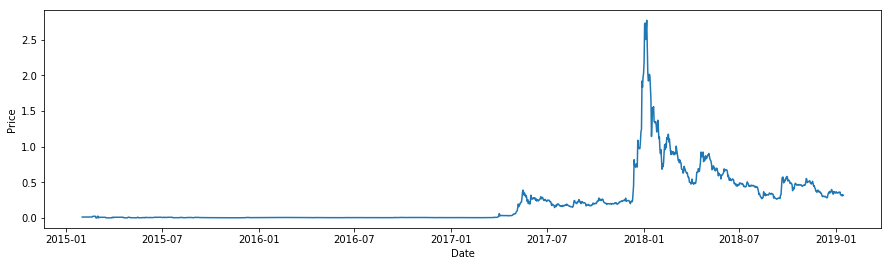

In [21]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="Date", y="Price", data=df)